In [1]:
import numpy as np
from scipy.integrate import solve_bvp
from matplotlib import pyplot as plt

from DroneUtils import *

In `DroneUtils.py`, we call the 12-dimensional state vector $\boldsymbol{\sigma}$ `state`, and the 12-dimensional costate vector $\mathbf{p}$ `costate`.

To set this up in `solve_bvp`, we will stack the state and costate into a 24 dimensional vector $\mathbf{y}$.

In summary,

$$
\begin{aligned}
    \mathbf{y} &= \begin{pmatrix} \boldsymbol{\sigma} \\ \mathbf{p} \end{pmatrix}, \\
    \boldsymbol{\sigma} &= \begin{pmatrix} \mathbf{s} \\ \dot{\mathbf{s}} \end{pmatrix}, \\
    \mathbf{s} &= \begin{pmatrix} x \\ y \\ z \\ \phi \\ \theta \\ \psi \end{pmatrix}, \\
    \mathbf{p} &= \begin{pmatrix} p_1 \\ \vdots \\ p_{12} \end{pmatrix}
\end{aligned}
$$

This is a boundary value problem, with the following boundary conditions:

$$
\boldsymbol{\sigma}(0) = \left( x_0, y_0, z_0, \phi_0, \theta_0, \psi_0, \dot{x}_0, \dot{y}_0, \dot{z}_0, \dot{\phi}_0, \dot{\theta}_0, \dot{\psi}_0 \right)
$$

$$
\boldsymbol{\sigma}(t_f) = \mathbf{0}
$$

In [2]:
lambda_ = 1
alpha = 1

sigma_init = np.array([
    1,       # Initial x
    3,       # Initial y 
    2,       # Initial z
    np.pi/8, # Initial phi
    np.pi/7, # Initial theta
    np.pi/6, # Initial psi
    0,       # Initial x velocity
    0,       # Initial y velocity
    0,       # Initial z velocity
    0,       # Initial phi velocity
    0,       # Initial theta velocity
    0        # Initial psi velocity
])

sigma_final = np.zeros_like(sigma_init)

In [3]:
count = 0

def ode(time, y):
    global count 
    count += 1
    state = y[:12]   # First half of `y` is state evolution
    costate = y[12:] # Second half of `y` is costate evolution

    state_prime_matrix = np.array([
        state_prime(state[:, t], costate[:, t], lambda_)
        for t in range(len(time))
    ]).T

    costate_prime_matrix = np.array([
        costate_prime(state[:, t], costate[:, t], alpha, lambda_)
        for t in range(len(time))
    ]).T

    result = np.vstack([
        state_prime_matrix,
        costate_prime_matrix
    ])

    return result

In [4]:
def bc(y_init, y_final):
    state_init = y_init[:12] 
    state_final = y_final[:12] 
    
    return np.hstack([
        state_init - sigma_init,
        state_final - sigma_final
    ])

In [5]:
timesteps = 100
t_range = np.linspace(0, 1, timesteps)


rng = np.random.default_rng()
y_guess = rng.normal(size=(24, timesteps))

sol = solve_bvp(
    ode,
    bc,
    t_range,
    y_guess
)

In [6]:
sol.status

2

In [7]:
count

55

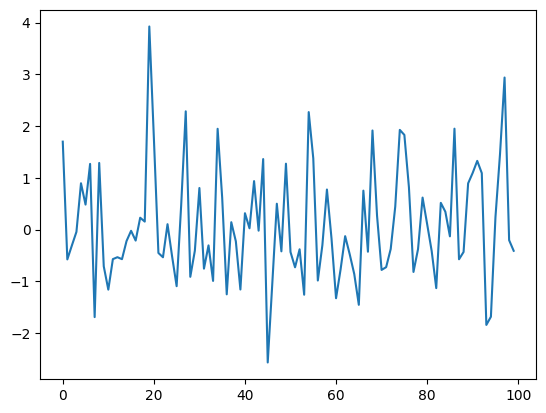

In [8]:
y_sol = sol.y

plt.plot(y_sol[2])
plt.show()